In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [62]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

pd.set_option('display.max_columns', train_data.shape[0])

In [63]:
train_data.columns

Index(['일시', '서울 기온(°C)', '서울 강수량(mm)', '서울 풍속(m/s)', '서울 풍향(16방위)',
       '서울 습도(%)', '서울 증기압(hPa)', '서울 이슬점온도(°C)', '서울 현지기압(hPa)',
       '서울 해면기압(hPa)', '서울 일조(hr)', '서울 일사(MJ/m2)', '서울 적설(cm)', '서울 시정(10m)',
       '서울 지면온도(°C)', '부산 기온(°C)', '부산 강수량(mm)', '부산 풍속(m/s)', '부산 풍향(16방위)',
       '부산 습도(%)', '부산 증기압(hPa)', '부산 이슬점온도(°C)', '부산 현지기압(hPa)',
       '부산 해면기압(hPa)', '부산 일조(hr)', '부산 일사(MJ/m2)', '부산 적설(cm)', '부산 시정(10m)',
       '부산 지면온도(°C)', '소요시간', 'weekday', 'holiday', 'Korean_holiday', 'year',
       'month'],
      dtype='object')

### 시각화

In [49]:
# 시각화 한글폰트 설정

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [50]:
def plot_scatterplot(data):
    target = '소요시간'
    for feature in data.columns:
        if data[feature].dtype=='object':
            continue
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.kdeplot(data[feature])
        plt.subplot(1, 2, 2)
        sns.regplot(feature, target, data=data, line_kws={"color": "red"})
        plt.grid()
        plt.show()

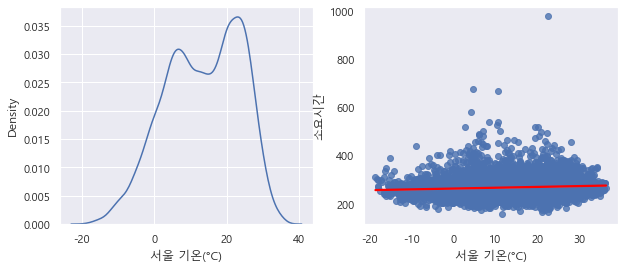

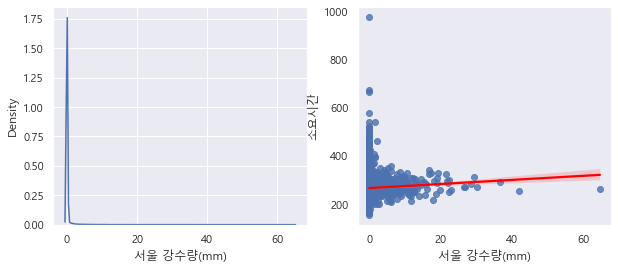

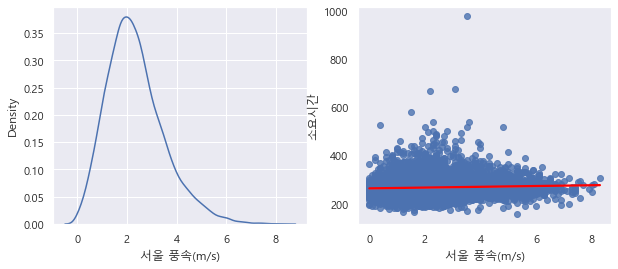

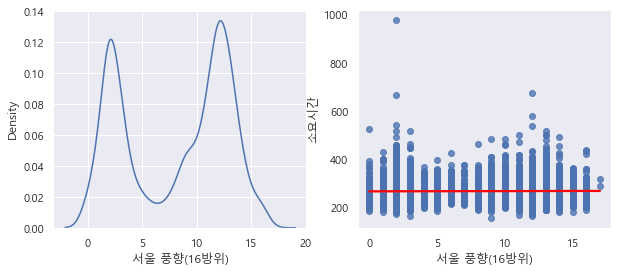

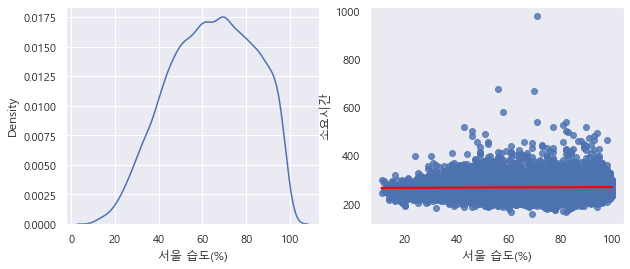

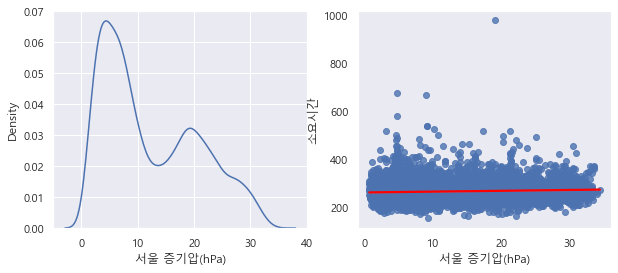

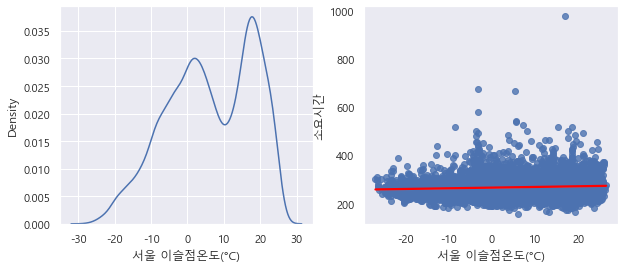

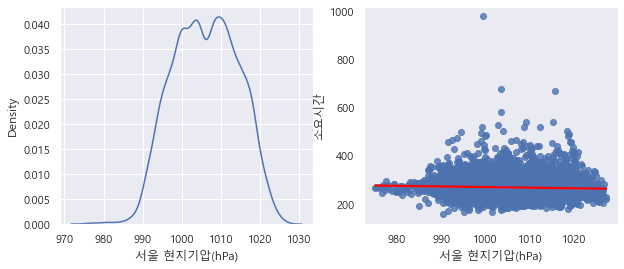

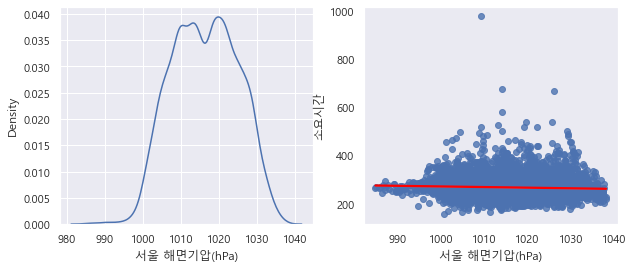

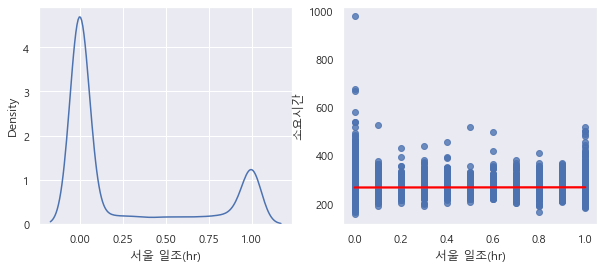

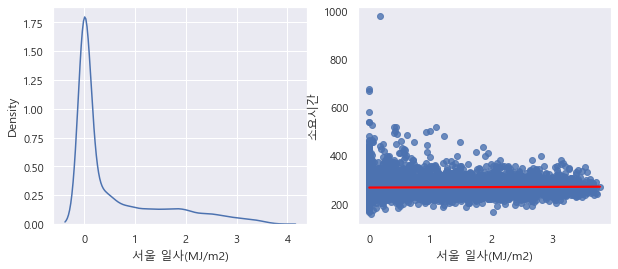

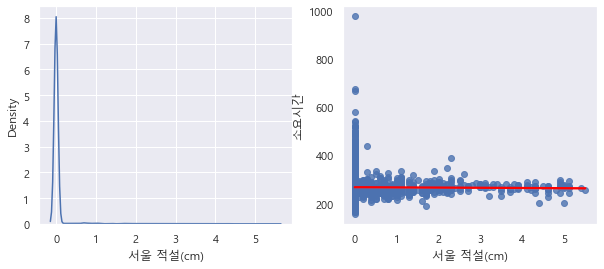

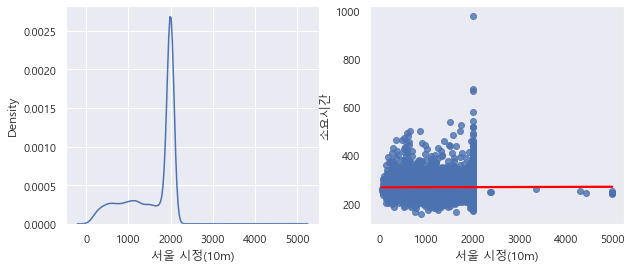

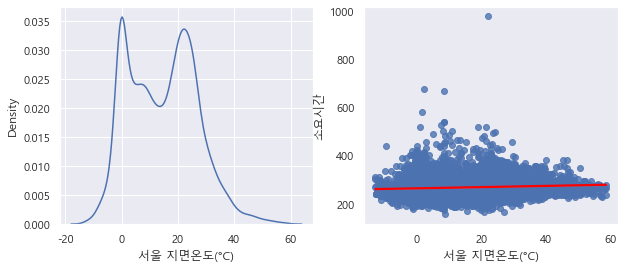

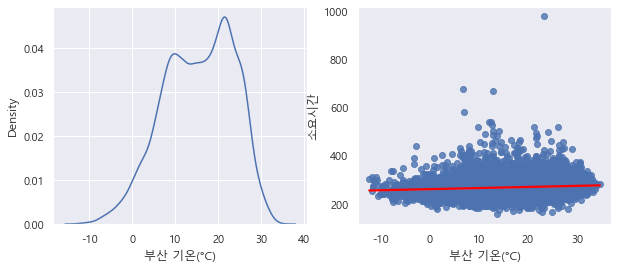

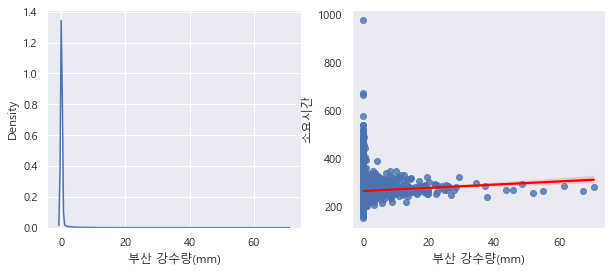

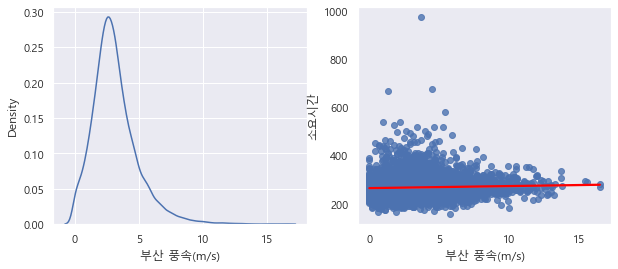

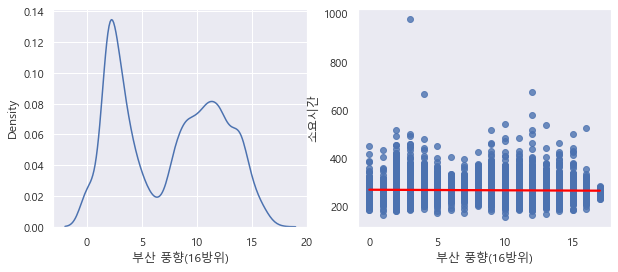

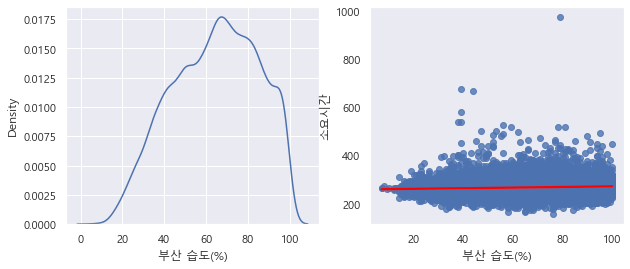

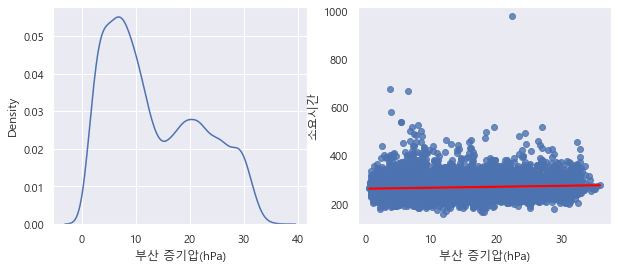

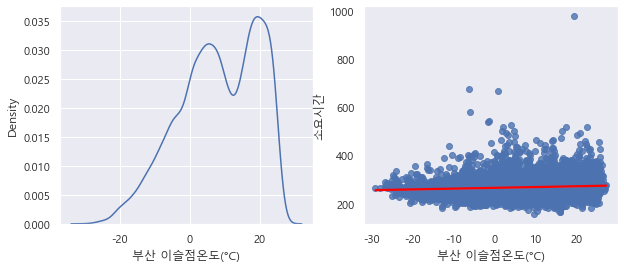

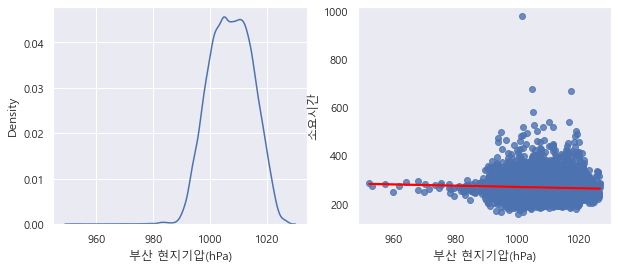

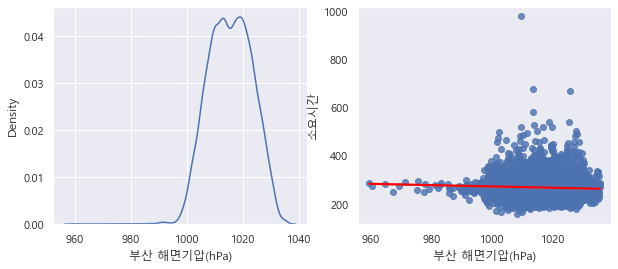

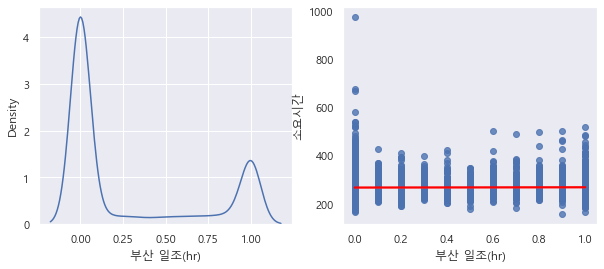

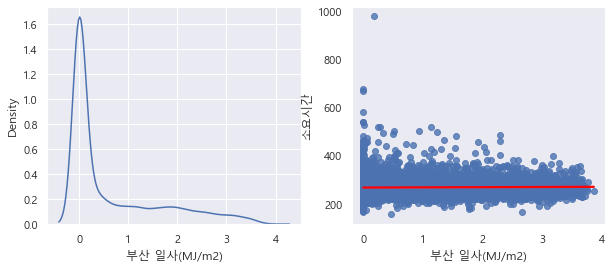

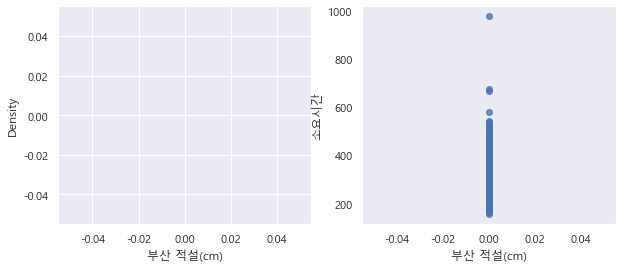

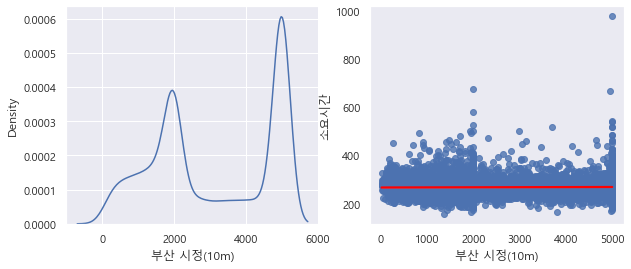

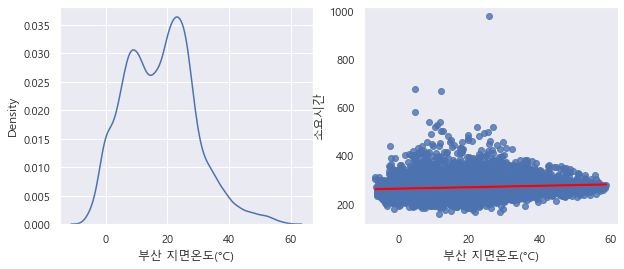

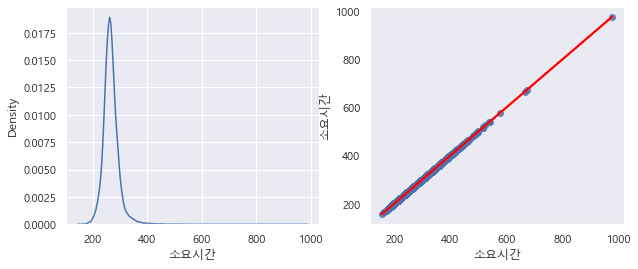

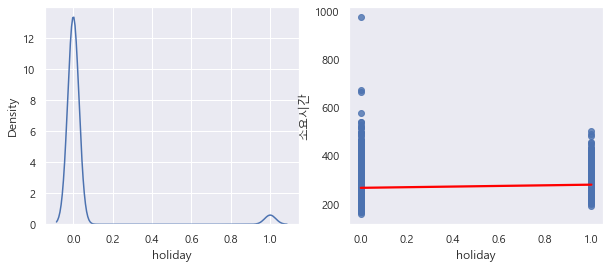

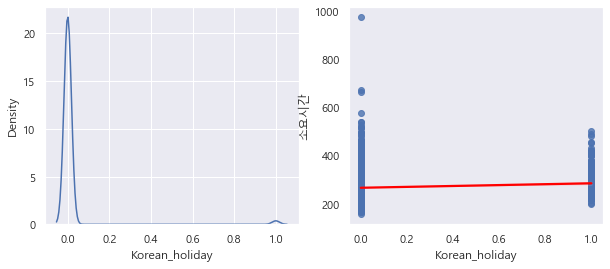

In [51]:
plot_scatterplot(train_data)

In [52]:
train_data['부산 적설(cm)'].unique()

array([0.])

In [64]:
train_data.drop(columns=['일시', '부산 적설(cm)'], axis=1, inplace=True)
test_data.drop(columns=['일시', '부산 적설(cm)'], axis=1, inplace=True)

- 가변수화

In [65]:
train_data.columns

Index(['서울 기온(°C)', '서울 강수량(mm)', '서울 풍속(m/s)', '서울 풍향(16방위)', '서울 습도(%)',
       '서울 증기압(hPa)', '서울 이슬점온도(°C)', '서울 현지기압(hPa)', '서울 해면기압(hPa)',
       '서울 일조(hr)', '서울 일사(MJ/m2)', '서울 적설(cm)', '서울 시정(10m)', '서울 지면온도(°C)',
       '부산 기온(°C)', '부산 강수량(mm)', '부산 풍속(m/s)', '부산 풍향(16방위)', '부산 습도(%)',
       '부산 증기압(hPa)', '부산 이슬점온도(°C)', '부산 현지기압(hPa)', '부산 해면기압(hPa)',
       '부산 일조(hr)', '부산 일사(MJ/m2)', '부산 시정(10m)', '부산 지면온도(°C)', '소요시간',
       'weekday', 'holiday', 'Korean_holiday', 'year', 'month'],
      dtype='object')

In [66]:
cols = ['weekday', 'holiday', 'Korean_holiday', 'year', 'month']
train_data = pd.get_dummies(train_data, columns=cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=cols, drop_first=True)

In [67]:
train_data

,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),서울 일사(MJ/m2),서울 적설(cm),서울 시정(10m),서울 지면온도(°C),부산 기온(°C),부산 강수량(mm),부산 풍속(m/s),부산 풍향(16방위),부산 습도(%),부산 증기압(hPa),부산 이슬점온도(°C),부산 현지기압(hPa),부산 해면기압(hPa),부산 일조(hr),부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,holiday_1,Korean_holiday_1,year_2021,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-6.5,0.0,0.0,0.0,38.0,1.4,-18.5,1022.6,1033.8,0.0,0.0,0.0,2000.0,-2.8,-2.5,0.0,1.7,16.0,23.0,1.2,-20.8,1021.7,1030.7,0.0,0.0,2000.0,-1.4,265,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-5.9,0.0,1.7,2.0,40.0,1.6,-17.3,1021.8,1033.0,0.0,0.0,0.0,2000.0,-2.4,-2.9,0.0,2.0,15.0,22.0,1.1,-21.7,1021.6,1030.6,0.0,0.0,2000.0,-1.6,265,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-5.7,0.0,0.1,0.0,42.0,1.7,-16.5,1021.6,1032.8,0.0,0.0,0.0,1988.0,-2.4,-3.1,0.0,1.9,6.0,23.0,1.1,-21.3,1021.6,1030.6,0.0,0.0,2000.0,-1.9,291,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-5.6,0.0,0.0,0.0,46.0,1.8,-15.4,1021.5,1032.7,0.0,0.0,0.0,2000.0,-2.7,-2.8,0.0,4.5,1.0,24.0,1.2,-20.6,1021.1,1030.1,0.0,0.0,2000.0,-2.0,284,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-5.4,0.0,0.0,0.0,50.0,2.0,-14.2,1021.6,1032.8,0.0,0.0,0.0,1908.0,-2.5,-3.1,0.0,1.9,5.0,35.0,1.7,-16.4,1021.0,1030.0,0.0,0.0,2000.0,-2.1,363,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,-6.4,0.0,2.2,11.0,34.0,1.3,-19.7,1021.1,1032.3,0.0,0.0,0.0,2000.0,-4.5,0.5,0.0,2.0,14.0,22.0,1.4,-18.8,1019.1,1028.0,0.0,0.0,5000.0,-1.6,309,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
17540,-6.3,0.0,4.1,14.0,35.0,1.3,-19.2,1021.2,1032.4,0.0,0.0,0.0,2000.0,-5.3,0.0,0.0,2.2,14.0,22.0,1.3,-19.2,1019.1,1028.0,0.0,0.0,5000.0,-2.1,320,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
17541,-6.7,0.0,4.8,14.0,36.0,1.3,-19.3,1021.2,1032.4,0.0,0.0,0.0,2000.0,-5.7,-0.4,0.0,4.1,13.0,23.0,1.4,-19.0,1018.7,1027.6,0.0,0.0,5000.0,-2.5,323,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
17542,-7.5,0.0,3.0,14.0,37.0,1.3,-19.7,1021.8,1033.1,0.0,0.0,0.0,2000.0,-6.2,-0.8,0.0,3.2,11.0,23.0,1.3,-19.4,1019.5,1028.4,0.0,0.0,5000.0,-2.2,355,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### target 변수 생성

In [75]:
train_data['y'] = train_data['소요시간'].shift(-1)
train_data['y'].fillna(test_data.iloc[0]['소요시간'], inplace=True)
train_data['y'] = train_data['y'].astype(int)

test_data['y'] = test_data['소요시간'].shift(-1)
test_data = test_data.iloc[:-1, :]
test_data['y'] = test_data['y'].astype(int)

### 데이터 나누기

In [78]:
target = 'y'

x_train = train_data.drop(target, axis=1)
y_train = train_data.loc[:, target]

x_test = test_data.drop(target, axis=1)
y_test = test_data.loc[:, target]

In [79]:
x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)